<a href="https://colab.research.google.com/github/Juniorffonseca/processo_seletivo/blob/main/teste_processo_seletivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** Traga insumos para validação ou refutação das seguintes hipóteses:

**1.1.** Ao longo do tempo é possível observar uma mudança na preferência de
escolha de medicamento do médico;

In [1]:
# Carregando pacotes
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime as dt
from datetime import timedelta


In [4]:
uploaded = files.upload() # Importando arquivos csv

Saving medicos.csv to medicos.csv
Saving membros.csv to membros.csv
Saving prescricoes.csv to prescricoes.csv
Saving visitados.csv to visitados.csv


In [2]:
# Gerando uma lista com cores que serão utilizadas em todos os plots
# aleatorio = [0, 0, 0]

# for i in range(3):
#     aleatorio[i] = np.random.rand()

lista = plt.cm.plasma_r([0.9817771747683106,
                         0.19557047808372098,
                         0.63000000000000])

lista [1] = plt.cm.ocean(0.7)
lista [2] = plt.cm.Reds(0.9)

lista_datas = ['10/20', '11/20', '12/20', '01/21', '02/21', '03/21', '04/21', '05/21', '06/21', # Gerando uma lista com as datas em ordem para usar nos xticks das plotagens
                  '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22',
                  '04/22', '05/22', '06/22', '07/22', '08/22', '09/22']

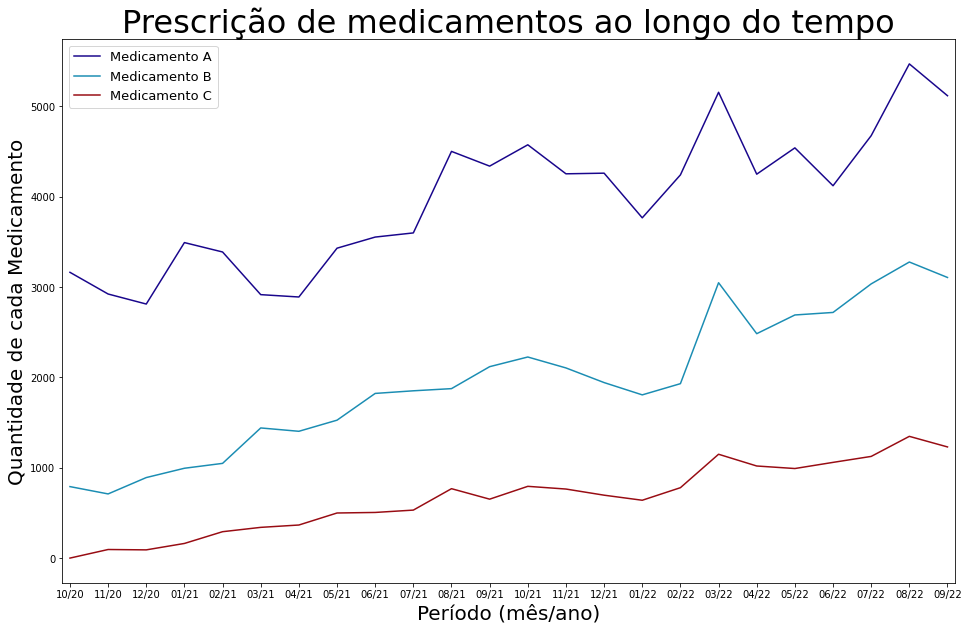

In [153]:
prescricoes = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1') # Carregando o arquivo csv em uma variável

prescricoes = prescricoes[['Medicamento_prescrito', 'Mes_prescricao']].value_counts().to_frame() # Fazendo a contagem de Medicamentos prescritos por Mês e passando para dataframe.
prescricoes = prescricoes.reset_index() # Resetando os indexs

prescricoes['Mes_prescricao'] = list(map(str, prescricoes['Mes_prescricao'])) # Usando map nas concatenações ano+mes(ex: 202204) como strings e retornando como lista para a coluna 'Mes_prescricao' do df 'prescricoes'.

prescricoes = prescricoes.pivot(index='Mes_prescricao', columns='Medicamento_prescrito') # Transformando a coluna 'Mes_prescricao' em Indexs e deixando apenas os Medicamentos como colunas (por meio da ferramenta pivot).

x_inicial = -0.2 # Definindo o 'limite' gráfico do eixo x para o lado esquerdo. 
x_final = len(prescricoes.index) - 0.8 # Definindo o 'limite' gráfico do eixo x para o lado direito.

prescricoes.plot(kind = 'line', stacked = 0, figsize = (16, 10), alpha = 1, color = lista, xlim = (x_inicial, x_final)) # Criando plot de linhas tamanho 16x10, com total opacidade, 
#com cores da lista de cores feita anteriormente e definindo limites visuais do gráficos no eixo x.

plt.xticks(range(0, len(lista_datas), 1), lista_datas) # Definindo onde começam os meses no eixo x, até onde vai e qual a frequência que aparecerão. Foi usada uma lista feita anteriormente com todos os meses/anos.
plt.title('Prescrição de medicamentos ao longo do tempo', size = 32) # Definindo o texto e tamanho presente no título do gráfico.
plt.xlabel('Período (mês/ano)', size = 20) # Definindo o texto e o tamanho presente na label do eixo x.
plt.ylabel('Quantidade de cada Medicamento', size = 20) # Definindo o texto e o tamanho presente na label do eixo y.

plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], prop={'size': 13})

plt.show() # Plotando o gráfico ao rodar a célula.


É possível notar que não houve mudança na preferência de escolha na prescrição de medicamento do médico, entretanto é possível notar que todos os medicamentos estão sendo constantemente mais recomendados ao longo do tempo. Isso pode se dar por diversos fatores, como, aumento frequente do número de médicos que se tornam membros, anúncios e visitas dos representantes dos medicamentos.

**1.2.** Existem outros fatores que influenciam na tomada de decisão de qual
medicamento o médico irá prescrever (geográfico e/ou especialidade médica
e/ou temporal);

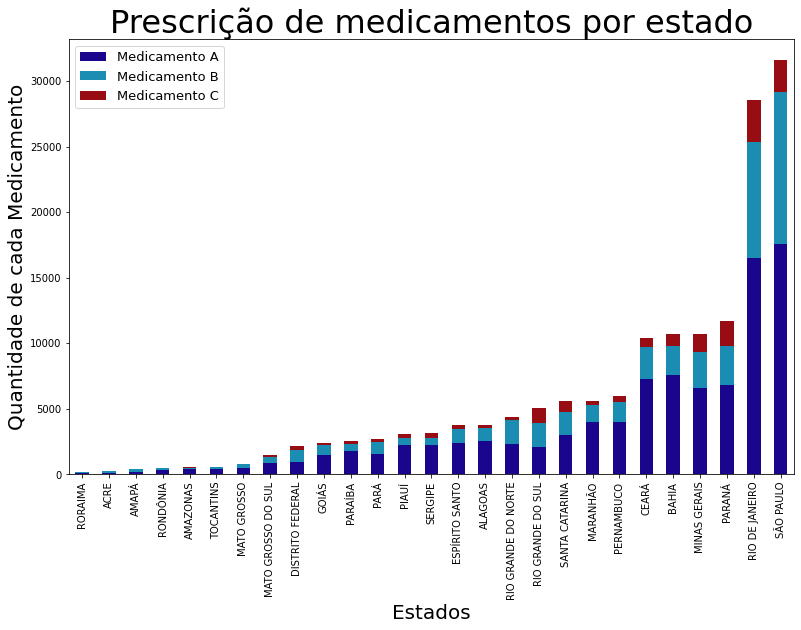

In [152]:
prescricoes_2 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1') # Carregando o arquivo csv em uma variável

prescricoes_2 = prescricoes_2[['Medicamento_prescrito', 'Estado']].value_counts().to_frame() # Fazendo a contagem de Medicamentos prescritos por estado e passando para dataframe.
prescricoes_2 = prescricoes_2.reset_index() # Resetando os indexs

prescricoes_2['Estado'] = list(map(str, prescricoes_2['Estado'])) # Usando map nos estados como strings e retornando como lista para a coluna 'Estado' do df 'prescricoes_2'.

prescricoes_2 = prescricoes_2.pivot(index='Estado', columns='Medicamento_prescrito')

prescricoes_2['Media_medicamentos'] = prescricoes_2.mean(axis=1)

prescricoes_2 = prescricoes_2.sort_values('Media_medicamentos')

del prescricoes_2['Media_medicamentos']

prescricoes_2.plot(kind = 'bar', stacked = 1, figsize = (13, 8), alpha = 1, color = lista) 
plt.title('Prescrição de medicamentos por estado', size = 32)
plt.xlabel('Estados', size = 20)
plt.ylabel('Quantidade de cada Medicamento', size = 20)
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], prop={'size': 13})
plt.show()

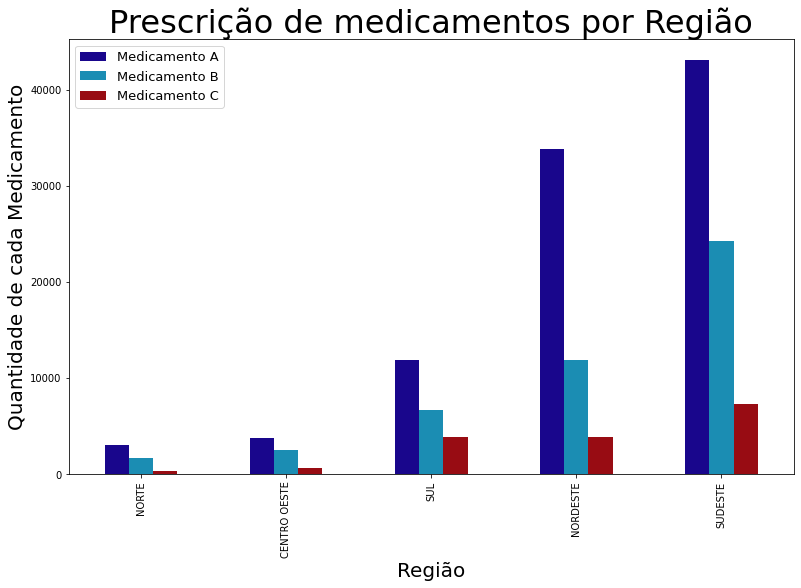

In [151]:
prescricoes_3 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1') # Recarregando arquivo csv em outra variável

prescricoes_3 = prescricoes_3[['Medicamento_prescrito', 'Regiao']].value_counts().to_frame() # Fazendo a contagem de Medicamentos prescritos por região e passando para dataframe.
prescricoes_3 = prescricoes_3.reset_index() # Resetando os indexs

prescricoes_3['Regiao'] = list(map(str, prescricoes_3['Regiao'])) # Usando map nas regiões como strings e retornando como lista para a coluna 'Regiao' do df 'prescricoes_3'.

prescricoes_3 = prescricoes_3.pivot(index='Regiao', columns='Medicamento_prescrito')

prescricoes_3['Media_medicamentos'] = prescricoes_3.mean(axis=1)

prescricoes_3 = prescricoes_3.sort_values('Media_medicamentos')

del prescricoes_3['Media_medicamentos']

prescricoes_3.plot(kind = 'bar', stacked = 0, figsize = (13, 8), alpha = 1, color = lista)
plt.title('Prescrição de medicamentos por Região', size = 32)
plt.xlabel('Região', size = 20)
plt.ylabel('Quantidade de cada Medicamento', size = 20)
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], prop={'size': 13})
plt.show()


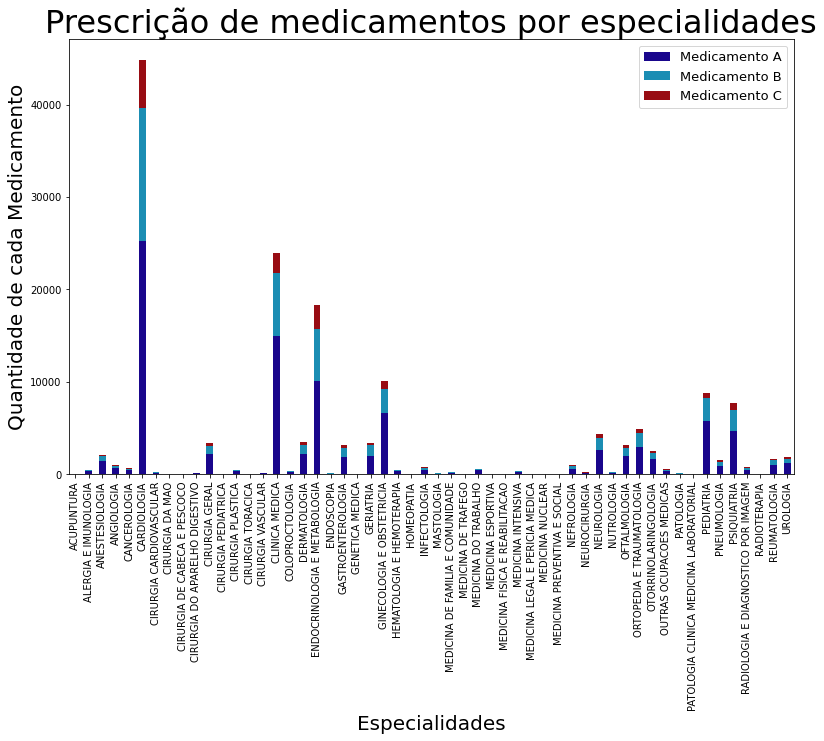

In [150]:
prescricoes_4 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1') # Recarregando arquivo csv em outra variável

prescricoes_4 = prescricoes_4[['Medicamento_prescrito', 'Especialidade']].value_counts().to_frame() # Fazendo a contagem de Medicamentos prescritos por especialidades e passando para dataframe.
prescricoes_4 = prescricoes_4.reset_index() # Resetando os indexs

prescricoes_4['Especialidade'] = list(map(str, prescricoes_4['Especialidade'])) # Usando map nas especialidades como strings e retornando como lista para a coluna 'Especialidade' do df 'prescricoes_4'.

prescricoes_4 = prescricoes_4.pivot(index='Especialidade', columns='Medicamento_prescrito') # Transformando a coluna de Especialidades em Indexs e deixando apenas os Medicamentos como colunas.

prescricoes_4.plot(kind = 'bar', stacked = 1, figsize = (13, 8), alpha = 1, color = lista) # Criando plot de barras estacadas com tamanho 13x8, com total opacidade e com cores da lista de cores feita anteriormente.
plt.title('Prescrição de medicamentos por especialidades', size = 32) # Definindo o título e o tamanho do mesmo.
plt.xlabel('Especialidades', size = 20) # Tamanho e label do eixo x.
plt.ylabel('Quantidade de cada Medicamento', size = 20) # Tamanho e label do eixo y.
plt.legend(['Medicamento A', 'Medicamento B', 'Medicamento C'], prop={'size': 13})
plt.show() # Plotagem


**1.3.** Existe uma relação sazonal na escolha do médico pelos medicamentos;

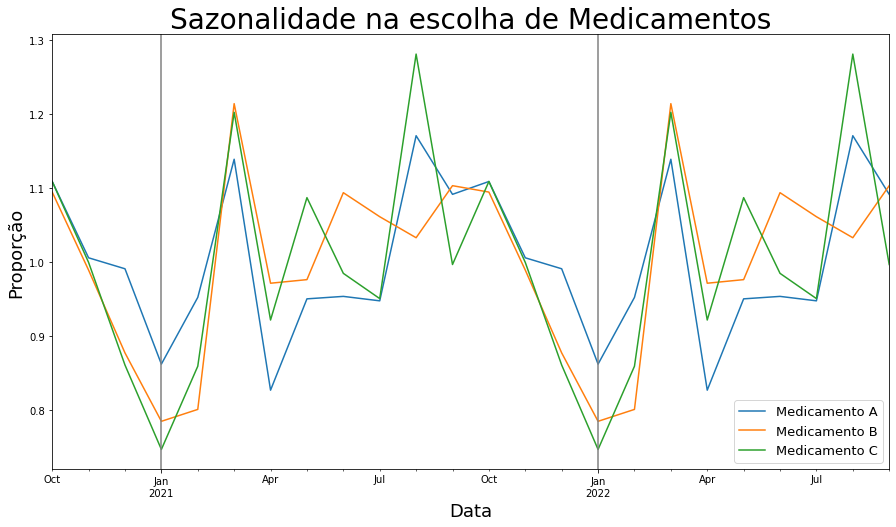

In [149]:
# Carregando csv em uma variável
prescricoes_5 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

# Importar biblioteca statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

#lista_0 = []

prescricoes_5['Mes_prescricao'] = pd.to_datetime(prescricoes_5['Mes_prescricao'], format='%Y%m')
prescricoes_5_a = prescricoes_5[prescricoes_5['Medicamento_prescrito'] == 'MEDICAMENTO A']
prescricoes_5_b = prescricoes_5[prescricoes_5['Medicamento_prescrito'] == 'MEDICAMENTO B']
prescricoes_5_c = prescricoes_5[prescricoes_5['Medicamento_prescrito'] == 'MEDICAMENTO C']

prescricoes_5_a = prescricoes_5_a.groupby(pd.Grouper(key = 'Mes_prescricao', freq='M'))['Medicamento_prescrito'].count()
prescricoes_5_b = prescricoes_5_b.groupby(pd.Grouper(key = 'Mes_prescricao', freq='M'))['Medicamento_prescrito'].count()
prescricoes_5_c = prescricoes_5_c.groupby(pd.Grouper(key = 'Mes_prescricao', freq='M'))['Medicamento_prescrito'].count()


result_a = seasonal_decompose(prescricoes_5_a, model='multiplicative', period=12).seasonal
result_b = seasonal_decompose(prescricoes_5_b, model='multiplicative', period=12).seasonal
result_c = seasonal_decompose(prescricoes_5_c, model='multiplicative', period=12).seasonal
ax_a = result_a.plot(figsize = (15, 8), label = 'Medicamento A')
ax_b = result_b.plot(ax = ax_a, label = 'Medicamento B')
ax_c = result_c.plot(ax = ax_b, label = 'Medicamento C')

plt.title('Sazonalidade na escolha de Medicamentos', size = 28)

plt.xlabel('Data', size = 18)
plt.ylabel('Proporção', size = 18)
plt.axvline(x = '2021-01-31',  color = 'gray') 
plt.axvline(x = '2022-01-31',  color = 'gray') 
plt.legend(loc = 'best', prop={'size': 13})
plt.show()

É notável uma relação entre sazonalidade e escolha dos medicamentos no mês de Agosto, quando houve um aumento maior da proporção de prescrições do medicamento A e C enquanto o medicamento B teve um aumento consideravelmente menor de sua prescrição comparado aos outros dois. É um padrão que pode ser visto inicialmente em Agosto de 2021 e que se repete em Agosto de 2022.

Outra relação de sazonalidade acontece nos meses de Maio, onde foi possível observar um padrão maior de aumento na prescrição dos medicamentos A e C e novamente o medicamento B não cresce tanto quanto os demais nesse mesmo período.

É importante notar que esse gráfico mostra a relação dos aumentos na prescrição de cada medicamento relacionando cada um consigo  mesmo, ou seja, não são valores absolutos. Quando um medicamento tem um aumento na prescrição maior que os outros em algum período de tempo não necessariamente ele está sendo mais prescrito que os outros.

**1.4.** Existe relação entre tornar-se membro da comunidade e/ou ser visitado com
o número de prescrições para cada um dos medicamentos;


In [ ]:
membros = pd.read_csv('membros.csv', sep = ';', encoding = 'latin-1')
prescricoes_6 = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')




In [ ]:
visitados = pd.read_csv('visitados.csv', sep = ';', encoding = 'latin-1')
prescricoes_7 = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')
